In [142]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
import scipy.ndimage
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [98]:
DATADIR = '/tmp/ml_data'

In [95]:
img = scipy.ndimage.imread('/tmp/ml_data/train/circ/000.jpg')
img.shape

(150, 150)

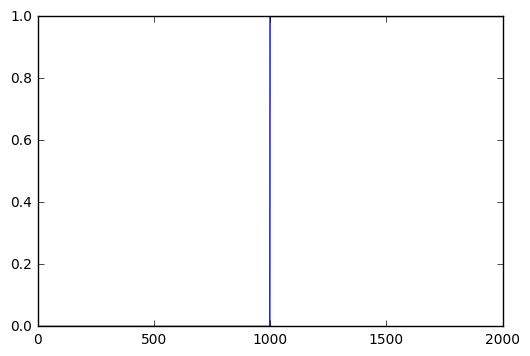

In [150]:
n_images = len(glob.glob(DATADIR + '/train/*/*.jpg'))
n_circ = len(glob.glob(DATADIR + '/train/circ/*.jpg'))
n_tri = len(glob.glob(DATADIR + '/train/tri/*.jpg'))
X_train = np.ndarray((n_images, 150, 150, 1))
for i in range(n_circ):
    X_train[i, :, :, 0] = scipy.ndimage.imread(DATADIR + '/train/circ/{0:03d}.jpg'.format(i))
for i in range(n_tri):
    X_train[i + n_circ, :, :, 0] = scipy.ndimage.imread(DATADIR + '/train/tri/{0:03d}.jpg'.format(i))

Y_train = np.zeros(X_train.shape[0])
Y_train[n_tri:] = np.ones(n_tri)
plt.plot(Y_train)

In [153]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [154]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, nb_epoch=10, batch_size=64)

Epoch 1/10


In [61]:
X_test= np.ndarray((600, 150, 150))
for i in range(300):
    X_test[i, :, :] = scipy.ndimage.imread('/tmp/ml_data/test/circ/{0:03d}.jpg'.format(i))
for i in range(300):
    X_test[i + 300, :, :] = scipy.ndimage.imread('/tmp/ml_data/test/tri/{0:03d}.jpg'.format(i))
X_test = X_test.reshape((600, 150 * 150))

In [87]:
y_test = np.zeros(600)
y_test[300:] = np.ones(300)

In [89]:
score = model.evaluate(X_test, y_test, batch_size=16)
score

592/600 [============================>.] - ETA: 0s

[7.9711924314498903, 0.5]

In [93]:
model.metrics_names

['loss', 'acc']

In [92]:
?model.evaluate